# Data Wrangling Project :  **WeRateDogs**
### By Kush Gupta



# Introduction
This project focused on wrangling data from the WeRateDogs Twitter account which rates dogs with humorous commentary. The rating denominator is usually 10, however, the numerators are usually greater than 10. They’re Good Dogs Brent wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. WeRateDogs has over 4 million followers and has received international media coverage. WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for us to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets.

The goal of this project is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. I needed to gather, asses and clean the Twitter data for a worthy analysis and visualization.

In [606]:
#importing required libaries
import pandas as pd
import numpy as np
import seaborn as sb
import requests
import json
import tweepy
import os
import matplotlib.patches as mpatches 
import matplotlib.pyplot as plt  
import time
%matplotlib inline
sb.set_style('darkgrid')

## Gathering of Data

**1. Downloaded twitter_archive_enhanced.csv manually and then importing it to dataframe using pandas read_csv() attribute.**

In [607]:
#reading in df1
df1=pd.read_csv('twitter-archive-enhanced.csv')

**2. Used the requests library and the provided url to programmatically dowload the file 'image_predictions.tsv' which hosted on Udacity's servers.**

In [608]:
# Use requests library to programmatically download the tsv file
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

link='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(link)

with open(os.path.join(folder_name, link.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [609]:
#reading data in df2
df2=pd.read_csv('image-predictions.tsv',sep= '\t')

**3. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.**

In [610]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

#creating connection
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [611]:
# Download Tweepy status object based on Tweet ID and store in list
found = []

with open('tweet_json.txt', 'a', encoding='UTF-8') as file:
    start_time = time.process_time()
    
    for tweet in list(df1.tweet_id):
        try:
            found.append(api.get_status(tweet)) 
            tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
            print(str(tweet), "No error, writing to memory.")
        
        except: 
            print("Error for: " + str(tweet))

In [612]:
# Read text file line by line to create dataframe
tweets_data = []
with open('tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
            
# Reading in df3
df3 = pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))
df3.head()

,entities,created_at,source,is_quote_status,possibly_sensitive_appealable,favorite_count,in_reply_to_user_id_str,retweet_count,extended_entities,truncated,...,user,in_reply_to_screen_name,full_text,coordinates,in_reply_to_status_id_str,contributors,id_str,possibly_sensitive,lang,retweeted
0,{'media': [{'media_url': 'http://pbs.twimg.com...,Tue Aug 01 16:23:56 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",False,False,38210,None,8371,{'media': [{'media_url': 'http://pbs.twimg.com...,False,...,"{'entities': {'description': {'urls': []}, 'ur...",None,This is Phineas. He's a mystical boy. Only eve...,None,None,None,892420643555336193,False,en,False
1,{'media': [{'media_url': 'http://pbs.twimg.com...,Tue Aug 01 00:17:27 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",False,False,32760,None,6179,{'media': [{'media_url': 'http://pbs.twimg.com...,False,...,"{'entities': {'description': {'urls': []}, 'ur...",None,This is Tilly. She's just checking pup on you....,None,None,None,892177421306343426,False,en,False
2,{'media': [{'media_url': 'http://pbs.twimg.com...,Mon Jul 31 00:18:03 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",False,False,24667,None,4091,{'media': [{'media_url': 'http://pbs.twimg.com...,False,...,"{'entities': {'description': {'urls': []}, 'ur...",None,This is Archie. He is a rare Norwegian Pouncin...,None,None,None,891815181378084864,False,en,False
3,{'media': [{'media_url': 'http://pbs.twimg.com...,Sun Jul 30 15:58:51 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",False,False,41539,None,8498,{'media': [{'media_url': 'http://pbs.twimg.com...,False,...,"{'entities': {'description': {'urls': []}, 'ur...",None,This is Darla. She commenced a snooze mid meal...,None,None,None,891689557279858688,False,en,False
4,{'media': [{'media_url': 'http://pbs.twimg.com...,Sat Jul 29 16:00:24 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",False,False,39725,None,9213,{'media': [{'media_url': 'http://pbs.twimg.com...,False,...,"{'entities': {'description': {'urls': []}, 'ur...",None,This is Franklin. He would like you to stop ca...,None,None,None,891327558926688256,False,en,False


> **At first i fetched all the columns in the df3, but according to our need we only required  later I will make a df_selected dataframe which will contain only Tweet_id, favorite_count and retweet_count.**

In [613]:
# Create a new dataframe df4 and only selecting the needed columns from df3
df4 = pd.DataFrame()

df4['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
df4['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
df4['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

## Assessing of Data
**Assessing is of two types-**

###### 1. Visual Assessment

In [614]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [615]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [616]:
df4.head()

,id,retweet_count,favorite_count
0,892420643555336193,8371,38210
1,892177421306343426,6179,32760
2,891815181378084864,4091,24667
3,891689557279858688,8498,41539
4,891327558926688256,9213,39725


### 2. Programmatic Assessment

In [617]:
# Details of df1
print("shape:",df1.shape,'\n')
print(df1.info())
df1.describe()

shape: (2356, 17) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo        

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [618]:
#checking for nulls
df1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [619]:
#checking for duplicates
df1.duplicated().sum()

0

In [620]:
df1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [621]:
#observing denominator column in df1
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [622]:
#observing denominators in df1
print(df1.loc[df1.rating_denominator == 11, 'text']) 
print(df1.loc[df1.rating_denominator == 2, 'text']) 
print(df1.loc[df1.rating_denominator == 120, 'text']) 
print(df1.loc[df1.rating_denominator == 40, 'text'])
print(df1.loc[df1.rating_denominator == 15, 'text'])
print(df1.loc[df1.rating_denominator == 0, 'text'])
print(df1.loc[df1.rating_denominator == 80, 'text'])
print(df1.loc[df1.rating_denominator == 170, 'text'])

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object
1433    Happy Wednesday here's a bucket of pups. 44/40...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object
1254    Here's a brigade of puppers. All look very pre...
1843    Here we have an entire platoon of puppers. Tot...
Name: text, dtype: object
1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object


In [623]:
#to read full text as above mention text is hidden
print(df1['text'][1779],'\n') 
print(df1['text'][1433],'\n') 
print(df1['text'][1254],'\n')
print(df1['text'][1843],'\n') 
print(df1['text'][1120]) 

IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq 

Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ 

Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12 

Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw 

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv


In [624]:
#observing numenator column in df1
df1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [625]:
#Details of df2
print("shape:",df2.shape,'\n')
print(df2.info())
df2.describe()

shape: (2075, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [626]:
#Check duplicate data
df2.jpg_url.duplicated().sum()

66

In [627]:
df2.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [628]:
print(df2.p1_dog.value_counts())
print(df2.p2_dog.value_counts())
print(df2.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [629]:
#Details of df4(data subset of df3)
print("shape:",df4.shape,'\n')
print(df4.info())
df4.describe()

shape: (2334, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2334 non-null   int64
 1   retweet_count   2334 non-null   int64
 2   favorite_count  2334 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB
None


,id,retweet_count,favorite_count
count,2.334000e+03,2334.000000,2334.000000
mean,7.423369e+17,2957.107112,8020.104113
std,6.838825e+16,4969.941299,12398.715859
min,6.660209e+17,0.000000,0.000000
25%,6.782926e+17,592.500000,1383.000000
50%,7.191522e+17,1381.500000,3490.500000
75%,7.987047e+17,3445.750000,9836.000000
max,8.924206e+17,84096.000000,164922.000000


## Analysis done by assessing of data
###  - These changes are to be done in cleaning section.

### Quality Issues:

**df1**
- Keep original ratings (no retweets) that have images
- Convert datatype of 'timestamp' column from object to datetime.
- Correct numerators with decimals
- Correct denominators other than 10: 
- Optimize the source contents for human reading habit; change the long url links to certain words.
- create a new column having rating in it.
- Delete columns that won't be used for analysis.

**df2**
- Drop  duplicates from column named 'jpg_url'.
- Create 1 column for image prediction and 1 column for confidence level
- Delete columns that won't be used for analysis

**df4**
- original dataset(d3) has many unwanted columns and d4 was made from only its 3 columns that were of interest.
- column named id is to be labeled as twitter_id. 


### Tidiness Issues:
1. Columns named 'doggo', 'floofer', 'pupper', 'puppo' in df1 should belong to one column. 
2. All tables should be part of one dataset.

# Cleaning of Data

In [630]:
d1 = df1.copy()
d2 = df2.copy()
d4 = df4.copy()

### Cleaning Quality Issues



**1. Keep original ratings that have images and delete the retweets in d1**

In [631]:
#Code: Delete retweets by filtering the non-null values of retweeted_status_user_id
d1 = d1[pd.isnull(d1['retweeted_status_user_id'])]

#Test
d1.retweeted_status_user_id.sum()

0.0

**2. Change the data type of 'timestamp' in d1**

In [632]:
#CODE: converting timestamp to datetime
d1['timestamp'] = pd.to_datetime(d1['timestamp'])

#TEST
d1.timestamp.head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

**3. Making all the numerators correct with decimals points in d1 dataset.**

In [633]:
#Code
d1[['rating_numerator', 'rating_denominator']] = d1[['rating_numerator','rating_denominator']].astype(float)

#Test
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   float64         

In [634]:
#CODE

#Update numerators
d1.loc[(d1.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
d1.loc[(d1.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
d1.loc[(d1.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
d1.loc[(d1.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
d1.loc[(d1.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#TEST
with pd.option_context('max_colwidth', 200):
    display(d1[d1['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

D:\anacondaa\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


**4. Making all the denoinators correct with in d1 dataset.**

In [635]:
#CODE: Update both numerators and denominators
d1.loc[(d1.tweet_id == 740373189193256964), 'rating_numerator'] = 14
d1.loc[(d1.tweet_id == 740373189193256964), 'rating_denominator'] = 10

d1.loc[(d1.tweet_id == 682962037429899265), 'rating_numerator'] = 10
d1.loc[(d1.tweet_id == 682962037429899265), 'rating_denominator'] = 10

d1.loc[(d1.tweet_id == 666287406224695296), 'rating_numerator'] = 9
d1.loc[(d1.tweet_id == 666287406224695296), 'rating_denominator'] = 10

d1.loc[(d1.tweet_id == 722974582966214656), 'rating_numerator'] = 13
d1.loc[(d1.tweet_id == 722974582966214656), 'rating_denominator'] = 10

d1.loc[(d1.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
d1.loc[(d1.tweet_id == 716439118184652801), 'rating_denominator'] = 10

#CODE: Delete five tweets with no actual ratings
d1 = d1[d1['tweet_id'] != 832088576586297345]
d1 = d1[d1['tweet_id'] != 810984652412424192]
d1 = d1[d1['tweet_id'] != 682808988178739200]
d1 = d1[d1['tweet_id'] != 835246439529840640]
d1 = d1[d1['tweet_id'] != 686035780142297088]

#TEST: Left only the group dogs for programatically clean
with pd.option_context('max_colwidth', 200):
    display(d1[d1['rating_denominator'] != 10][['tweet_id','text','rating_numerator','rating_denominator','source']])

,tweet_id,text,rating_numerator,rating_denominator,source
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1634,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"


**5.  Optimize the source content by removing html tags**


In [636]:
#CODE: using regular expressions to remove html tags
d1.source = d1.source.str.replace(r'<[^>]*>', '')

#TEST:
d1.source.tail()

2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, dtype: object

**6. Create a new column named rating in d1** 

In [637]:
#CODE: 
d1['rating'] = 10 * d1['rating_numerator'] / d1['rating_denominator'].astype(float)

#TEST
d1.rating.head()

0    13.0
1    13.0
2    12.0
3    13.0
4    12.0
Name: rating, dtype: float64

**7. Drop the unwanted columns in d1**

In [638]:
#Code
d1 = d1.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], 1)

#Test
d1.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None,13.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None,13.0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None,12.0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None,13.0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None,12.0


**8. Drop duplicates jpg_url in d2**

In [639]:
#CODE: Delete duplicated jpg_url
d2 = d2.drop_duplicates(subset=['jpg_url'], keep='last')

#TEST
print("Duplicates in jpg_url:",d2['jpg_url'].duplicated().sum(),"\n")
df2.head()

Duplicates in jpg_url: 0 



,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**9. Creating 1 column for image prediction and 1 column for confidence level in d2**

In [640]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists

dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(d2):
    if d2['p1_dog'] == True:
        dog_type.append(d2['p1'])
        confidence_list.append(d2['p1_conf'])
    elif d2['p2_dog'] == True:
        dog_type.append(d2['p2'])
        confidence_list.append(d2['p2_conf'])
    elif d2['p3_dog'] == True:
        dog_type.append(d2['p3'])
        confidence_list.append(d2['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
d2.apply(image, axis=1)

#create new columns
d2['dog_type'] = dog_type
d2['confidence_list'] = confidence_list

In [641]:
#drop rows that has prediction_list 'error'
d2 = d2[d2['dog_type'] != 'Error']

#TEST: 
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1691 non-null   int64  
 1   jpg_url          1691 non-null   object 
 2   img_num          1691 non-null   int64  
 3   p1               1691 non-null   object 
 4   p1_conf          1691 non-null   float64
 5   p1_dog           1691 non-null   bool   
 6   p2               1691 non-null   object 
 7   p2_conf          1691 non-null   float64
 8   p2_dog           1691 non-null   bool   
 9   p3               1691 non-null   object 
 10  p3_conf          1691 non-null   float64
 11  p3_dog           1691 non-null   bool   
 12  dog_type         1691 non-null   object 
 13  confidence_list  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


**10. Drop unwanted columns from d2**

In [642]:
#Code
d2.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1,inplace =True)

#Test
d2.head()

,tweet_id,jpg_url,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


**11. Rename column 'id' in d4 to 'tweet_id' in d4**

In [643]:
# Define: rename the column id 

# Code
d4 = d4.rename(columns={'id':'tweet_id'})

#Test
d4.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8371,38210
1,892177421306343426,6179,32760
2,891815181378084864,4091,24667
3,891689557279858688,8498,41539
4,891327558926688256,9213,39725


### Cleaning Tidiness Issues

**1. Combine the columns 'doggo', 'floofer', 'pupper', 'puppo' in d1 to one column.** 

In [644]:
# Define: use loc to add a new column dog_class = doggo, floofer, pupper or poppo. NaN will be used if not any of the previous

# CODE
d1.loc[d1['doggo'] == 'doggo', 'dog_class'] = 'doggo'
d1.loc[d1['floofer'] == 'floofer', 'dog_class'] = 'floofer'
d1.loc[d1['pupper'] == 'pupper', 'dog_class'] = 'pupper'
d1.loc[d1['puppo'] == 'puppo', 'dog_class'] = 'puppo'

# dropping unneded doggo, floofer, pupper or poppo columns
d1 = d1.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#TEST
d1.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,rating,dog_class
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,13.0,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,13.0,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,12.0,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,13.0,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,12.0,NaN


**2. ALL THE DATASETS ARE TO BE A PART OF ONE DATASET**
> **a)  merge d1 and d2 to data**

In [645]:
#CODE: create a new dataframe data to store merger data of df1 and df2
data = pd.merge(d1, d2, how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
data = data[data['jpg_url'].notnull()]

#TEST
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1 to 2169
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1625 non-null   int64              
 1   timestamp           1625 non-null   datetime64[ns, UTC]
 2   source              1625 non-null   object             
 3   text                1625 non-null   object             
 4   rating_numerator    1625 non-null   float64            
 5   rating_denominator  1625 non-null   float64            
 6   name                1625 non-null   object             
 7   rating              1625 non-null   float64            
 8   dog_class           251 non-null    object             
 9   jpg_url             1625 non-null   object             
 10  dog_type            1625 non-null   object             
 11  confidence_list     1625 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

> **b) merge data and df4**

In [646]:
#CODE: create a new dataframe data to store merger data of data and df4
data = pd.merge(data, d4, how = 'left', on = ['tweet_id'])

#TEST
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1625 non-null   int64              
 1   timestamp           1625 non-null   datetime64[ns, UTC]
 2   source              1625 non-null   object             
 3   text                1625 non-null   object             
 4   rating_numerator    1625 non-null   float64            
 5   rating_denominator  1625 non-null   float64            
 6   name                1625 non-null   object             
 7   rating              1625 non-null   float64            
 8   dog_class           251 non-null    object             
 9   jpg_url             1625 non-null   object             
 10  dog_type            1625 non-null   object             
 11  confidence_list     1625 non-null   object             
 12  retweet_count       1621 non-null 

> ### Preview of final dataset

In [647]:
data.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,rating,dog_class,jpg_url,dog_type,confidence_list,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,13.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6179.0,32760.0
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,12.0,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4091.0,24667.0
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,13.0,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8498.0,41539.0
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,12.0,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9213.0,39725.0
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10.0,None,13.0,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,3062.0,19937.0


# Storing of Data

In [656]:
#saving into the final dataset in a CSV file
data.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

# Analyzing and Visualizing of Data


**1. Most observed type of dog.**

In [649]:
data['dog_type'].value_counts()

golden_retriever        142
Labrador_retriever      103
Pembroke                 94
Chihuahua                87
pug                      60
                       ... 
clumber                   1
standard_schnauzer        1
Bouvier_des_Flandres      1
silky_terrier             1
EntleBucher               1
Name: dog_type, Length: 113, dtype: int64

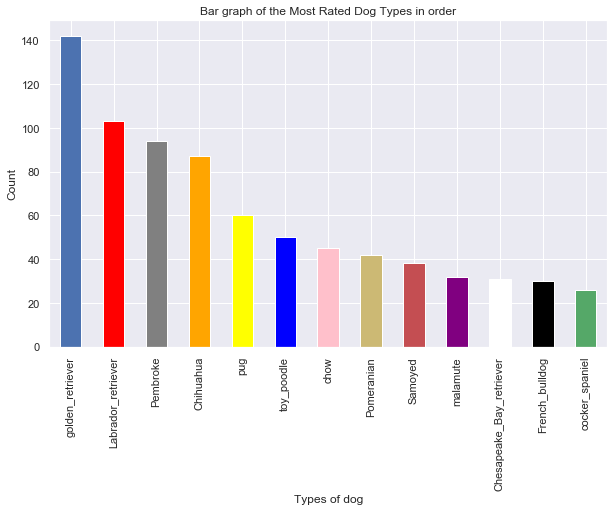

In [650]:
sb.set_style('darkgrid')
df_dog_type = data.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'bar',figsize=(10,6),color=['b','red','grey','orange','yellow','blue','pink','y','r','purple','white','black','g'])
plt.title('Bar graph of the Most Rated Dog Types in order')
plt.ylabel('Count')
plt.xlabel('Types of dog');

> From graph, it is observed that gold retriever is the most dog in the dataset.

**2. Plot of rating given.**

In [651]:
data.rating.describe()

count    1625.000000
mean       10.803865
std         1.784010
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating, dtype: float64

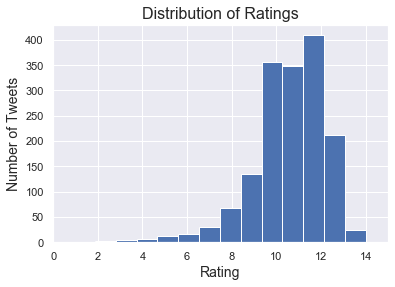

In [652]:
data['rating'].plot(kind = 'hist', bins = 15)

plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)
plt.title('Distribution of Ratings', fontsize = 16)
plt.show();

>The distribution of ratings is very skewed to the left. From the descriptive statistics above we see that 75% of all ratings are between 10 and 14 inclusive 

**3. Ratings based on Retweet Counts.**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


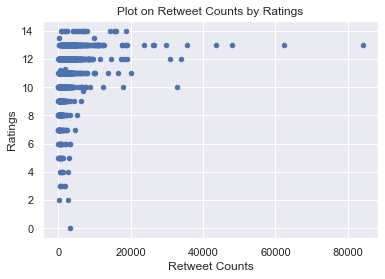

In [653]:
data.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Plot on Retweet Counts by Ratings')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');

>The highest ratings do not receive the most retweets.

**4. Favourite count overtime**

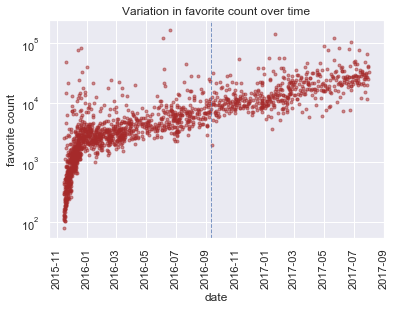

In [654]:
# The date of origin of "they're good dogs Brent" meme
good_meme_date = pd.to_datetime('2016-9-12')

fig, ax = plt.subplots()
ax.plot_date(data.timestamp, data.favorite_count, alpha=0.5, ms=3, c='brown')
# log transform the scale
ax.set_yscale('log')
plt.xlabel('date')
plt.ylabel('favorite count')
plt.xticks(rotation =90)
plt.title('Variation in favorite count over time')
plt.axvline(good_meme_date, lw=1, ls='dashed', alpha=0.7);

>Favorite count of the tweets in the WeRateDogs page increased rapidly between November 2015 and January 2016. Afterwards, there has been a steady increase over time.

**5. Distribution of source.**

Twitter for iPhone    1596
Twitter Web Client      20
TweetDeck                9
Name: source, dtype: int64


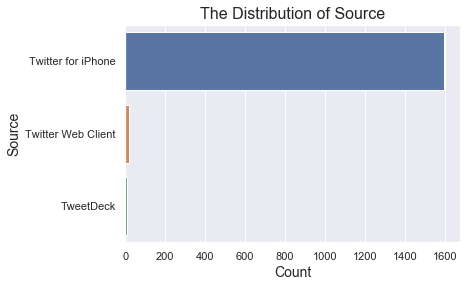

In [655]:
sorted_source = data['source'].value_counts().index
print(data.source.value_counts())
sb.set(style="darkgrid")
sb.countplot(data = data, y = 'source', order = sorted_source)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('The Distribution of Source',fontsize=16);

>This plot above shows the distribution of source. We can see that the dominate source of tweets is from iPhone twitter app, which is about 95% in the total. That means the twitter app is the main channel for people using to tweet, retweet, post, and others, while the TweetDeck is pretty rare (less than 1%).

# Resources
- https://classroom.udacity.com/nanodegrees/nd002/parts/af503f34-9646-4795-a916-190ebc82cb4a/modules/14d9f5f1-9e7b-4bfb-97f3-bcdbf4a3699c/lessons/a8085857-3e28-4fc7-aeb8-da64ccbc2e20/concepts/d7e3de1b-d7a1-4ebc-9d58-beba021a7c29

- https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
- https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json
- http://docs.tweepy.org/en/v3.5.0/auth_tutorial.html
- https://www.geeksforgeeks.org/python-os-makedirs-method/
- https://towardsdatascience.com/progress-bars-in-python-4b44e8a4c482